# Fundamentos de Robótica 2021-2: PC2

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Pregunta 1

In [2]:
# Funciones auxiliares
def sTrasl(x, y, z):
    """ Transformación homogénea que representa traslación pura
    """
    T = sp.Matrix([[1,0,0,x],
                   [0,1,0,y],
                   [0,0,1,z],
                   [0,0,0,1]])
    return T

def sTrotz(ang):
    """ Transformación homogénea que representa rotación alrededor de z
    """
    T = sp.Matrix([[sp.cos(ang),-sp.sin(ang),0,0],
                   [sp.sin(ang), sp.cos(ang),0,0],
                   [0,0,1,0],
                   [0,0,0,1]])
    return T

In [3]:
# a) 
q1, q2, q3, L = sp.symbols("q1 q2 q3 L")
T = sTrasl(q1, q2, 0) * sTrotz(q3) * sTrasl(L, 0, 0)
T

Matrix([
[cos(q3), -sin(q3), 0, L*cos(q3) + q1],
[sin(q3),  cos(q3), 0, L*sin(q3) + q2],
[      0,        0, 1,              0],
[      0,        0, 0,              1]])

In [4]:
# c)
L = 0.3
xd = np.array([1, 1])
Qk0 = np.array([0.2, 0.3, np.deg2rad(45)])

q1 = Qk0[0]; q2 = Qk0[1]; q3 = Qk0[2]
Qk1 = Qk0 + 0.1 * np.array([[1,0],[0,1],[-L*np.sin(q3),L*np.cos(q3)]]) @ \
      (xd - np.array([L*np.cos(q3)+q1, L*np.sin(q3)+q2]))
Qk1      

array([0.2587868 , 0.3487868 , 0.78327684])

In [5]:
q1 = Qk1[0]; q2 = Qk1[1]; q3 = Qk1[2]
Qk2 = Qk1 + 0.1 * np.array([[1,0],[0,1],[-L*np.sin(q3),L*np.cos(q3)]]) @ \
      (xd - np.array([L*np.cos(q3)+q1, L*np.sin(q3)+q2]))

Qk2

array([0.31164996, 0.39273996, 0.78143032])

## Pregunta 2

In [6]:
# c)

def Tdh(d, th, a, alpha):
    cth = np.cos(th);    sth = np.sin(th)
    ca = np.cos(alpha);  sa = np.sin(alpha)
    Tdh = np.array([[cth, -ca*sth,  sa*sth, a*cth],
                    [sth,  ca*cth, -sa*cth, a*sth],
                    [0,        sa,     ca,      d],
                    [0,         0,      0,      1]])
    return Tdh

def cdirecta(q):
    """ Retorna los sistemas de referencia de cada eslabón con respecto a la base
    """
    # Transformaciones homogéneas de DH
    T01 = Tdh( 265,   q[0]+np.pi,    0, np.pi/2);
    T12 = Tdh(   0, q[1]+np.pi/2,  444,       0);
    T23 = Tdh(   0,   q[2]+np.pi, -110, np.pi/2);
    T34 = Tdh( 470,   q[3]+np.pi,    0, np.pi/2);
    T45 = Tdh(   0,   q[4]+np.pi,  -80, np.pi/2);
    T56 = Tdh( 101,         q[5],    0,       0);
    # Efector final con respecto a la base
    Tf = T01.dot(T12).dot(T23).dot(T34).dot(T45).dot(T56)
    return Tf

In [7]:
# Cuando todos los ángulos son cero:
q = [0, 0, 0, 0, 0, 0]
np.round(cdirecta(q), 3)

array([[  0.,   0.,   1., 571.],
       [ -0.,   1.,  -0.,  -0.],
       [ -1.,  -0.,   0., 899.],
       [  0.,   0.,   0.,   1.]])

In [8]:
# Cuando el primer ángulo es 90
q = [np.pi/2, 0, 0, 0, 0, 0]
np.round(cdirecta(q), 3)

array([[  0.,  -1.,   0.,   0.],
       [  0.,   0.,   1., 571.],
       [ -1.,  -0.,   0., 899.],
       [  0.,   0.,   0.,   1.]])

## Pregunta 3

In [9]:
# a)
A = np.array([[      0,      0,      0,    0, 0, 1],
              [   4**5,   4**4,   4**3, 4**2, 4, 1],
              [      0,      0,      0,    0, 1, 0],
              [ 5*4**4, 4*4**3, 3*4**2,  2*4, 1, 0],
              [      0,      0,      6,    0, 0, 0],
              [60*4**2,   24*4,      6,    0, 0, 0]])
b = np.array([1, 3, 0, 0, 0, 0])

x = np.linalg.inv(A) @ b
np.round(x,4)

array([ 0.002 , -0.0195, -0.    ,  0.3125,  0.    ,  1.    ])

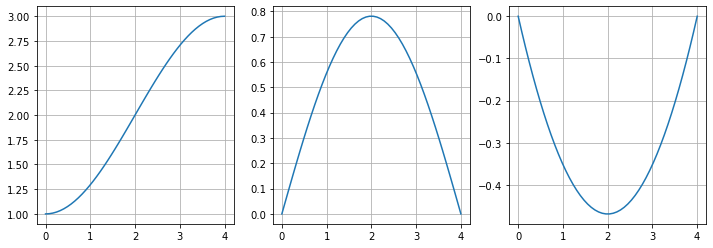

In [10]:
# Verificación (no necesaria para la pregunta)
a5=x[0]; a4=x[1]; a3=x[2]; a2=x[3]; a1=x[4]; a0=x[5]

t = np.linspace(0,4)
q = a5*t**5 + a4*t**4 + a3*t**3 + a2*t**2 + a1*t + a0
dq = a1 + 2*a2*t + 3*a3*t**2 + 4*a4*t**3 + 5*a5*t**4
dddq = 6*a3 + 24*a4*t + 60*a5*t**2

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.plot(t, q); plt.grid()
plt.subplot(1,3,2); plt.plot(t, dq); plt.grid()
plt.subplot(1,3,3); plt.plot(t, dddq); plt.grid()